# Part 1

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from itertools import combinations

### Loading the iris dataset using pandas

In [147]:
iris_df = pd.read_csv('Iris.csv')


## Q1 General analysis

In [148]:
print("Features: ")
print(list(iris_df.columns))

print("Sample: ")
print(iris_df.head())

print("Ranges & Scales: ")
iris_df.describe()

Features: 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Sample: 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Ranges & Scales: 


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Q2 Test Train split

In [149]:
def logistic_regressor_accuray(dataset, test_size_ratio):
  train, test = train_test_split(dataset, test_size=test_size_ratio)
  train_x = train.iloc[:, :-1]
  train_y = train.iloc[:, -1]
  test_x = test.iloc[:, :-1]
  test_y = test.iloc[:, -1]

  clf = LogisticRegression(max_iter=1000).fit(train_x, train_y.values.ravel())
  return clf.score(X=test_x, y=test_y.values.ravel())

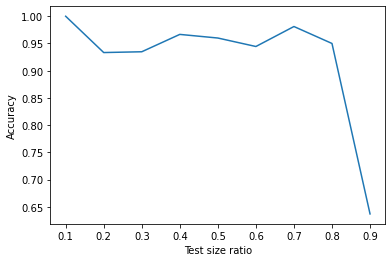

In [150]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [logistic_regressor_accuray(dataset=iris_df, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Accuracy')
plt.show()

## Q3 Balanced dataset

Q: The 150-sample dataset is completely balanced what does that mean?

A: It means that the given samples are distributed equally between the 3 available labels as shown below:

Label distribution of the Balanced dataset:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


<AxesSubplot:ylabel='species'>

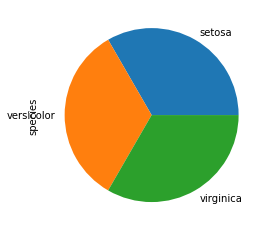

In [151]:
balanced_species_records = iris_df['species'].value_counts()
print("Label distribution of the Balanced dataset:")
print(balanced_species_records)
balanced_species_records.plot.pie()

### Creating unbalanced subset of 110

Label distribution of the Unbalanced dataset:
setosa        50
versicolor    50
virginica     11
Name: species, dtype: int64


<AxesSubplot:ylabel='species'>

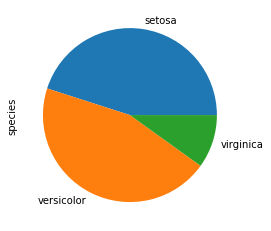

In [152]:
ub_iris = iris_df.loc[0:110, :]

# Plotting the new dataset label distribution
unbalanced_species_records = ub_iris['species'].value_counts()
print("Label distribution of the Unbalanced dataset:")
print(unbalanced_species_records)
unbalanced_species_records.plot.pie()

## Q4 Label Balancing

Label distribution of the new dataframe:
setosa        11
virginica     11
versicolor    11
Name: species, dtype: int64


<AxesSubplot:ylabel='species'>

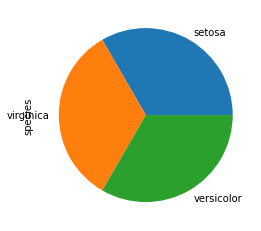

In [153]:
label_counts = ub_iris['species'].value_counts()
l_min = min(label_counts)

rand_dataset = ub_iris.sample(frac=1)
balanced_df = rand_dataset.groupby('species').head(l_min)

# Plotting the new dataframe label distribution
balanced_species_records = balanced_df['species'].value_counts()
print("Label distribution of the new dataframe:")
print(balanced_species_records)
balanced_species_records.plot.pie()

### Training and Testing the new balanced dataset

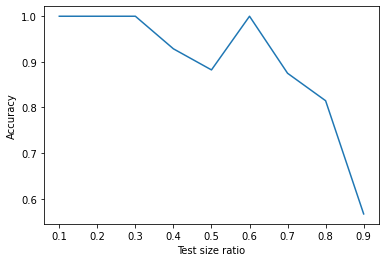

In [160]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [logistic_regressor_accuray(dataset=balanced_df, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Accuracy')
plt.show()

## Q5 naive feature selection

In [155]:
def naive_k_features(k, train_set, test_set):

  def fit_logistic(train_x, train_y, test_x, test_y):
    clf = LogisticRegression(max_iter=1000).fit(train_x, train_y.values.ravel())
    return clf.score(X=test_x, y=test_y.values.ravel())
  
  learnable_columns = iris_df.columns[:-1]
  classes_column = list(iris_df.columns[-1:])
  k_columns = [list(columns) for columns in list(combinations(learnable_columns, k))]
  accuracies = [fit_logistic(train_set[columns], train_set[classes_column], test_set[columns], test_set[classes_column]) for columns in k_columns]

  return k_columns[np.argmax(accuracies)]

In [156]:
# Running the function we defined with k=2

train_set, test_set = train_test_split(iris_df, test_size=0.8)

print("The best accuracy columns are:")
print(naive_k_features(k=2, train_set=train_set, test_set=test_set))

The best accuracy columns are:
['petal_length', 'petal_width']
